In [0]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

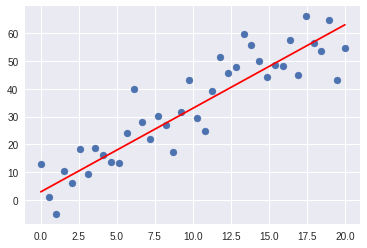

In [66]:
sample = 40

x_train = np.linspace(0, 20, sample)
y_train = 3*x_train + (2+ 8*np.random.randn(sample) + np.arcsinh(np.random.randn()))

plt.scatter(x_train, y_train)
plt.plot(x_train, 3*x_train+3, "r")

In [0]:
X = tf.placeholder(dtype=tf.float32, shape=None)
Y = tf.placeholder(dtype=tf.float32, shape=None)

In [0]:
W = tf.Variable(np.random.randn(), dtype=tf.float32, name="weight")
b = tf.Variable(np.random.randn(), dtype=tf.float32, name="bias")

"""
W = tf.Variable(2**10, dtype=tf.float32, name="weight")
b = tf.Variable(10, dtype=tf.float32, name="bias")
"""

In [0]:
Y_pred = X*W + b

In [0]:
cost = tf.reduce_sum((Y_pred - Y) ** 2) / (2 * sample)

In [0]:
learning_rate = 0.1

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = optimizer.minimize(cost)

In [0]:
initialize = tf.global_variables_initializer()

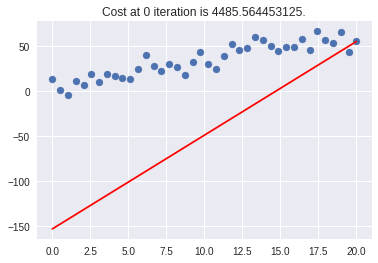

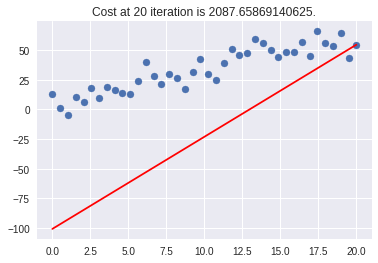

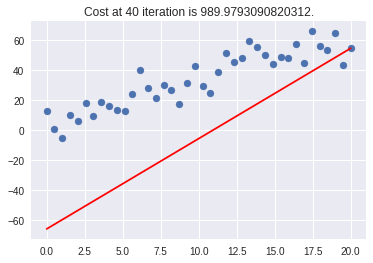

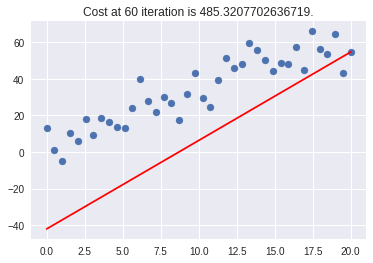

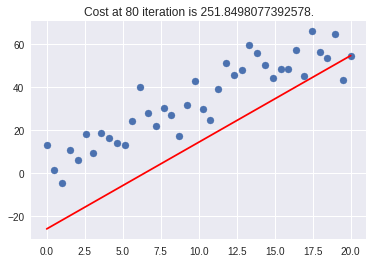

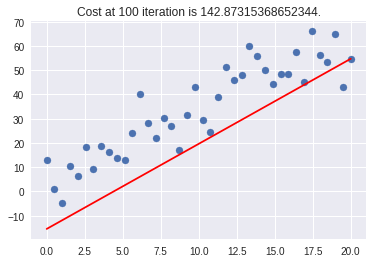

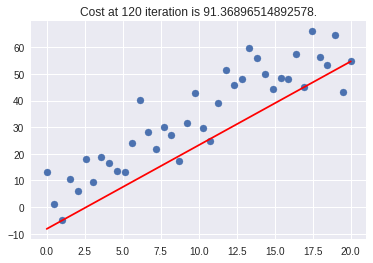

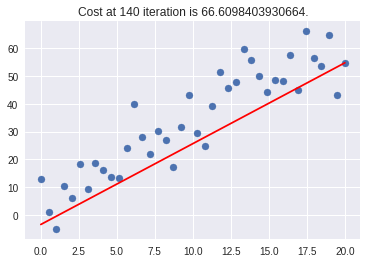

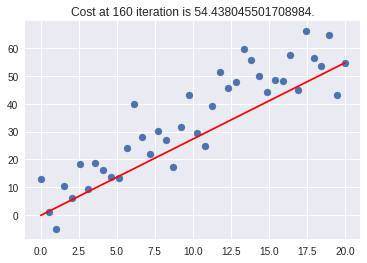

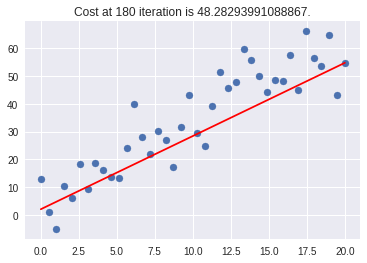

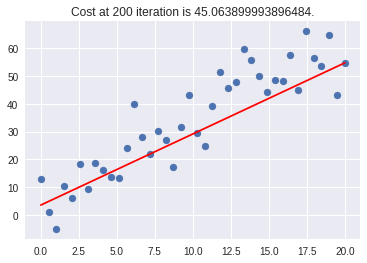

In [85]:
epochs=200

with tf.Session() as sess:
  sess.run(initialize)
  
  for epoch in range(epochs+1):
    for x,y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {
                                        X: x,
                                        Y: y
                                      })
      
    if not epoch % 20:
      c_value = sess.run(cost, feed_dict = {
                                      X: x_train,
                                      Y: y_train
                                    })
      w_value = sess.run(W)
      b_value = sess.run(b)
      
      plt.scatter(x_train, y_train)
      plt.plot(x_train, w_value*x_train + b_value, "r")
      plt.title("Cost at {} iteration is {}.".format(epoch, c_value))
      plt.show()
